In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import panel as pn
import re
from bokeh.plotting import figure, show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
pn.extension(comms='vscode')

In [2]:
assets_df = pd.read_csv('data/jordans_asset_dataset_2023_03_06.csv')
# assets_full_df = assets_df.copy()
assets_df.rename(columns={'asset.u_asset_id':'asset_id'}, inplace=True)

display(f"{len(assets_df)} assets_df rows")
display(f"{len(assets_df['asset_id'].unique())} assets_df['asset_id'] unique rows")

'2707 assets_df rows'

"2707 assets_df['asset_id'] unique rows"

In [3]:
for col in assets_df.columns:
    print (col)

asset.cost_center
asset_id
assigned_to
assigned_to.active
assigned_to.cost_center
assigned_to.department
assigned_to.employee_number
assigned_to.manager
BioAccess.bioFire Email Address
assigned_to.u_company_code
BioAccess.Display Name
BioAccess.Email
BioAccess.Employee ID
BioAccess.Employee Status
BioAccess.Username
category
Computer Name
BioAccess.Sunset Date
Intune.Azure AD Device ID
Intune.Azure AD registered
Intune.Category
Intune.CellularTechnology
Intune.Compliance
Intune.Computer Name
Intune.Device ID
Intune.Device state
Intune.EAS activated
Intune.EAS activation ID
Intune.EAS reason
Intune.EAS status
Intune.EID
Intune.Encrypted
Intune.Enrollment date
Intune.EthernetMAC
Intune.Free storage
Intune.ICCID
Intune.IMEI
Intune.Intune registered
Intune.Jailbroken
Intune.JoinType
Intune.Last check-in
Intune.Managed by
Intune.Management name
Intune.Manufacturer
Intune.MEID
Intune.Model
Intune.OS
Intune.OS version
Intune.Ownership
Intune.Phone number
Intune.Primary user display name
Intun

In [4]:
computers_by_employee_id_df = assets_df.loc[:,['assigned_to.employee_number', 'Computer Name']].groupby(['assigned_to.employee_number']).count()
computers_by_employee_id_df.columns = ["user_asset_count"]
# computers_by_employee_id_df.loc[computers_by_employee_id_df.loc[:,"user_asset_count"] == 0 ]
assets_df = assets_df.merge(computers_by_employee_id_df, on="assigned_to.employee_number")

In [5]:
assets_df.index

RangeIndex(start=0, stop=2707, step=1)

In [6]:
assets_df.groupby(['assigned_to.department']).count()

,asset.cost_center,asset_id,assigned_to,assigned_to.active,assigned_to.cost_center,assigned_to.employee_number,assigned_to.manager,BioAccess.bioFire Email Address,assigned_to.u_company_code,BioAccess.Display Name,...,Sophos.Protection,Sophos.Tamper protection,support_group,u_ci,u_status,u_sub_status,warranty_expiration,sys_created_on,sys_created_on.1,user_asset_count
assigned_to.department,,,,,,,,,,,,,,,,,,,,,
2103103,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Accounting Services US,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Accounting US,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Americas HR Operations,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Americas manufacturing controlling,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US Hardware,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
US Marketing,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
US Marketing Communication,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [7]:
missing_value_count_df = len(assets_df) - assets_df.count()
missing_value_count_df.loc[missing_value_count_df > 0]


BioAccess.Employee ID       17
BioAccess.Username          17
BioAccess.Sunset Date       17
Intune.Enrollment date       7
Intune.Last check-in         7
Intune.OS version            7
ISAOS.Description         2685
location                     1
MDE.Device IPs               1
MDE.OS Platform              2
dtype: int64

In [8]:
assets_df["ISAOS.Description"].loc[assets_df.loc[:,"ISAOS.Description"].notna()]

18                                    Microspotter System
192                                                BioMek
199                              Used for Waters Software
212                              Used for Waters Software
250                                   Microspotter System
252                                   Microspotter System
253                                   Microspotter System
256                                   Microspotter System
261                                   Microspotter System
780                                   Craig's Test Laptop
878                                             BioChem 2
879                                        Receiving Dock
880          Raw Materials Warehouse(Receiving Warehouse)
881             Array Automation 1 (Laura Hutchings) left
882            Array Automation 2 (Laura Hutchings) right
883       515 Array by gowning area - outside Office 1203
884                             515 Array by manual lines
885           

In [9]:
assets_df[assets_df['Intune.Free storage'].eq("None Listed")].count()

asset.cost_center          125
asset_id                   125
assigned_to                125
assigned_to.active         125
assigned_to.cost_center    125
                          ... 
u_sub_status               125
warranty_expiration        125
sys_created_on             125
sys_created_on.1           125
user_asset_count           125
Length: 127, dtype: int64

In [10]:
assets_df[assets_df['Intune.Jailbroken'].eq("None Listed")].count()

asset.cost_center          125
asset_id                   125
assigned_to                125
assigned_to.active         125
assigned_to.cost_center    125
                          ... 
u_sub_status               125
warranty_expiration        125
sys_created_on             125
sys_created_on.1           125
user_asset_count           125
Length: 127, dtype: int64

In [11]:
def search_in_features(search_pattern:str, case_sensitive = False) -> list[str]:
    search_list = []
    for col_name in assets_df.columns:
        search_area = col_name.split('.').pop(-1)
        if case_sensitive:
            result = re.search(search_pattern, search_area, re.IGNORECASE)
        else:
            result = re.search(search_pattern, search_area)
        if result:
            print(col_name)
            search_list.append(col_name)
    return search_list


In [12]:
assets_df.loc[:,search_in_features("OS", True) + search_in_features('Operating System')]


asset.cost_center
assigned_to.cost_center
Intune.OS
Intune.OS version
Intune.SystemManagementBIOSVersion
MDE.Exposure Level
MDE.OS Build
MDE.OS Distribution
MDE.OS Platform
MDE.OS Version
Sophos.OS
ISAOS.Operating System Version Number
ISAOS.Operating System


,asset.cost_center,assigned_to.cost_center,Intune.OS,Intune.OS version,Intune.SystemManagementBIOSVersion,MDE.Exposure Level,MDE.OS Build,MDE.OS Distribution,MDE.OS Platform,MDE.OS Version,Sophos.OS,ISAOS.Operating System Version Number,ISAOS.Operating System
0,2860747,2860747,Windows,10.0.19044.2486,1.5.1,None Listed,0,None Listed,None Listed,None Listed,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
1,2858030,2858030,Windows,10.0.19044.2486,1.9.0,No data available,19042,Windows10,Windows10,20H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2,2860705,2860705,Windows,10.0.19044.2364,1.10.0,None Listed,0,None Listed,None Listed,None Listed,Windows 10 Enterprise,10.0 (19044),Windows 10 Pro
3,2860705,2860705,Windows,10.0.19042.2604,1.24.0,Medium,19042,Windows10,Windows10,20H2,Windows 10 Enterprise,10.0 (19042),Windows 10 Enterprise
4,2121010,2121010,Windows,10.0.19044.2604,1.9.3,Low,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,2858020,2858020,Windows,10.0.19044.2604,1.9.1,Medium,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2703,2850100,2850100,Windows,10.0.19044.2486,1.9.1,Medium,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2704,2860740,2860740,Windows,10.0.19044.2486,1.8.0,Medium,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2705,2858100,2858100,Windows,10.0.19044.2486,1.9.1,None Listed,0,None Listed,None Listed,None Listed,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise


## Feature assessment
I went through the columns of the dataset and made notes in `data_dict.csv`. I'm reading it in here for easy access. First, I need to review any fields that needed a calculation (some of them may depend on fields I will drop). Then I can drop all tables I indicated as drop.

In [13]:
data_def_df = pd.read_csv('data/data_dict.csv')

## Calculated fields

In [14]:
data_def_df.loc[data_def_df['To Calculate'].notna()]

,Feature,Data Type,To Calculate,Notes
19,Intune.Azure AD registered,bool,convert,replace None Listed with False
25,Intune.Device state,bool,convert,Managed -> True
34,Intune.Free storage,int,impute,None Listed (125) -> Impute to median
37,Intune.Intune registered,bool,convert,Registered -> True
40,Intune.Last check-in,timestamp,convert,timestamp as seconds
68,ISAOS.Creation Date,timestamp,convert,timestamp as seconds
71,ISAOS.Last Logon Date,timestamp,convert,timestamp as seconds
88,MDE.Last device update,timestamp,convert,timestamp as seconds
110,SCCMODNS.ODNS Installed,bool,convert,yes no to true false
123,warranty_expiration,timestamp,convert,timestamp as seconds


### Timestamps

In [15]:
timestamp_features_df = data_def_df.loc[data_def_df['Data Type'].eq('timestamp')]
timestamp_fields = timestamp_features_df.Feature.to_list()
print(timestamp_fields)

['Intune.Last check-in', 'ISAOS.Creation Date', 'ISAOS.Last Logon Date', 'MDE.Last device update', 'warranty_expiration']


In [16]:
assets_df.loc[:,timestamp_fields]

,Intune.Last check-in,ISAOS.Creation Date,ISAOS.Last Logon Date,MDE.Last device update,warranty_expiration
0,2023-03-03 01:17:28.0000000,2022-12-09 00:00:00,2023-03-02 00:00:00,1111-01-11 00:00:00,2024-12-03 00:00:00
1,2023-03-07 21:53:48.3972502,2022-12-09 00:00:00,2023-03-06 00:00:00,2022-11-09 00:00:00,2023-11-06 00:00:00
2,2022-12-30 18:51:06.0000000,2022-12-20 00:00:00,2022-12-30 00:00:00,1111-01-11 00:00:00,2025-08-16 00:00:00
3,2023-03-07 18:41:08.2211538,2019-12-05 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,2022-11-07 00:00:00
4,2023-03-07 18:51:04.4899720,2022-12-22 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,2025-08-17 00:00:00
...,...,...,...,...,...
2702,2023-03-05 12:27:04.0000000,2023-01-31 00:00:00,2023-03-05 00:00:00,2023-03-05 00:00:00,2025-11-30 00:00:00
2703,2023-03-07 18:33:07.9048017,2023-01-31 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,2025-11-30 00:00:00
2704,2023-03-03 03:41:08.0000000,2023-02-02 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2026-01-13 00:00:00
2705,2023-03-07 20:45:05.4168119,2023-01-30 00:00:00,2023-03-07 00:00:00,1111-01-11 00:00:00,2025-11-30 00:00:00


In [17]:
import datetime
def datetime_to_timestamp(time_str:str, format="%Y-%m-%d %H:%M:%S"):
    if not isinstance(time_str, str) or time_str == "None Listed":
        return pd.NA
    try: 
        dt = datetime.datetime.strptime(time_str, format)
        timestamp = dt.timestamp()
    except Exception as e:
        #when a value like '2023-03-03 01:17:28.0000000' is processed using my default format an error is raised
        #"unconverted data remains: .0000000"
        #resolved by splitting the remains off before running the function
        if str(e).__contains__('unconverted data remains:'):
            timestamp = datetime_to_timestamp(time_str.split('.')[0], format)
        else:
            e.add_note(f' Attemtped time_str value: {time_str} type {type(time_str)}')
            raise e 
    return timestamp

print(datetime_to_timestamp("1111-01-11 00:00:00"))
print(datetime_to_timestamp("2023-03-03 01:17:28.0000000"))
print(datetime_to_timestamp("2023-03-03 01:17:28"))
print(datetime_to_timestamp("None Listed"))
print(datetime_to_timestamp(np.nan))

-27106617600.0
1677806248.0
1677806248.0
<NA>
<NA>


In [18]:
for col_name in timestamp_fields:
    try:
        assets_df.loc[:,col_name] = assets_df.loc[:,col_name].map(datetime_to_timestamp)
    except Exception as e:
        print(e)
        print(e.__notes__)

In [19]:
assets_df[timestamp_fields].head()

,Intune.Last check-in,ISAOS.Creation Date,ISAOS.Last Logon Date,MDE.Last device update,warranty_expiration
0,1677806248.0,1670544000.0,1677715200.0,-27106617600.0,1733184000.0
1,1678226028.0,1670544000.0,1678060800.0,1667952000.0,1699228800.0
2,1672426266.0,1671494400.0,1672358400.0,-27106617600.0,1755302400.0
3,1678214468.0,1575504000.0,1678147200.0,1678147200.0,1667779200.0
4,1678215064.0,1671667200.0,1678147200.0,1678147200.0,1755388800.0


### Booleans

In [20]:
bool_features_df = data_def_df.loc[data_def_df['Data Type'].eq('bool')]
bool_features = bool_features_df.Feature.to_list()
print(bool_features)

['assigned_to.active', 'Intune.Azure AD registered', 'Intune.Device state', 'Intune.Intune registered', 'ISAOS.Disabled', 'SCCMODNS.ODNS Installed']


In [21]:
for col_name in bool_features:
    print(f"-------{col_name}---------")
    print(assets_df.loc[:, col_name].unique())
    

-------assigned_to.active---------
[ True False]
-------Intune.Azure AD registered---------
['None Listed' 'True']
-------Intune.Device state---------
['Managed' 'None Listed']
-------Intune.Intune registered---------
['Registered' 'None Listed']
-------ISAOS.Disabled---------
[False  True]
-------SCCMODNS.ODNS Installed---------
['No' 'Yes']


In [22]:
def fix_bools(value_str: str) -> bool:
    if not isinstance(value_str, (str, bool)):
        raise ValueError(f"String expected. {type(value_str)} recieved.")
        ## Reviewing the data, None Listed is a placeholder for missing data, but in these boolean cases it appears to represent False. 
        # Need to review this more deeply
    if value_str in ['None Listed', 'No', 'False', False]:
        return False
    elif value_str in ['Managed', 'Registered', 'Yes', 'True', True]:
        return True
    else:
        raise ValueError(f"Unexpected value '{value_str}' in a column intended to be converted to boolean values.")

In [23]:

for feature in bool_features:
    # print(feature)
    assets_df.loc[:,feature] = assets_df.loc[:,feature].map(fix_bools)

In [24]:
for col_name in bool_features:
    print(f"-------{col_name}---------")
    print(assets_df.loc[:, col_name].unique())

-------assigned_to.active---------
[ True False]
-------Intune.Azure AD registered---------
[False True]
-------Intune.Device state---------
[True False]
-------Intune.Intune registered---------
[True False]
-------ISAOS.Disabled---------
[False  True]
-------SCCMODNS.ODNS Installed---------
[False True]


### Features to Drop

In a manual review of the features I selected several to drop and marked them as 'drop' in the Data Type column of data_dict.csv

Let's drop those features now.

In [25]:
#find and review the features to drop
drop_features_df = data_def_df.loc[data_def_df['Data Type'].eq('drop')]
drop_features = drop_features_df.Feature.to_list()

print(f"{len(assets_df.columns)} original features")
print(f"{len(drop_features)} features to drop")
print(f"{len(assets_df.columns) - len(drop_features_df)} features to remain")



127 original features
72 features to drop
55 features to remain


In [26]:
#drop the features
assets_df.drop(drop_features, axis="columns", inplace=True)

In [27]:
#verify the count of remaining features
print(f"{len(assets_df.columns)} features")

55 features


## Missing Values

In [28]:
assets_df.isna().sum().loc[assets_df.isna().sum() > 0]


Intune.Last check-in    125
Intune.OS version         7
location                  1
dtype: int64

In [29]:
# these are timestamps, so highest value is most recent checkin
# NA means that the computer hasn't ever checked in, which is meaningful
# Because NA is mathematically meaningless we'll convert it to an oldest value with a significant distance
# from the actual oldest value.
# I will measure the distance between the oldest and newest checkin and use 1/4 of that value to add to the oldest value
# to represent NA

last_checkin_range = assets_df['Intune.Last check-in'].max() - assets_df['Intune.Last check-in'].min()
checkin_na_fill = assets_df['Intune.Last check-in'].min() - last_checkin_range/4

# `Intune.OS version` and `location` are both categorical values, so Undefined works well for missing values.
version_and_location_na_fill = "Undefined"


In [30]:
assets_df['Intune.Last check-in'] = assets_df['Intune.Last check-in'].apply(lambda x: x if pd.notna(x) else checkin_na_fill)

In [31]:
assets_df['Intune.OS version'] = assets_df['Intune.OS version'].apply(lambda x: x if pd.notna(x) else version_and_location_na_fill)
assets_df['location'] = assets_df['location'].apply(lambda x: x if pd.notna(x) else version_and_location_na_fill)

In [32]:
assets_df.loc[:,['Intune.Last check-in', 'Intune.OS version','location']].apply(pd.unique).map(len)

Intune.Last check-in    2175
Intune.OS version         71
location                   7
dtype: int64

In [33]:
assets_df.isna()

,asset.cost_center,asset_id,assigned_to.active,assigned_to.department,assigned_to.employee_number,assigned_to.manager,assigned_to.u_company_code,BioAccess.Employee Status,Intune.Azure AD registered,Intune.Category,...,MDE.Tags,MDEHunt.MDE EDR Status,ref_u_cmdb_ci_computer_euc.u_shared,SCCM.Details_Table0_AgentName,SCCMODNS.ODNS Installed,Sophos.Health Status,u_status,u_sub_status,warranty_expiration,user_asset_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2704,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Intune.Category                        2703
MDE.Tags                               2075
Intune.TPMManufacturerId                478
Intune.TPMManufacturerVersion           478
MDEHunt.MDE EDR Status                  356
ref_u_cmdb_ci_computer_euc.u_shared     272
Intune.SystemManagementBIOSVersion      269
MDE.Is AAD Joined                       243
dtype: int64

<Axes: >

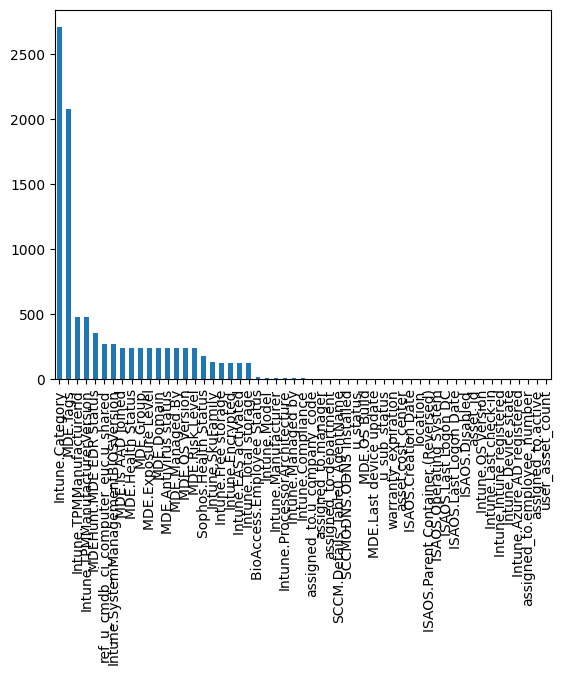

In [34]:
def s_count_notlisted(s:pd.Series):
    value_counts = s.value_counts()
    return value_counts.loc[value_counts.index == 'None Listed'].sum()

display(assets_df.apply(s_count_notlisted).sort_values(ascending=False)[:8])
assets_df.apply(s_count_notlisted).sort_values(ascending=False).plot.bar()

In [35]:
assets_df.drop(columns=['Intune.Category', 'MDE.Tags'],inplace=True)

Intune.TPMManufacturerId               478
Intune.TPMManufacturerVersion          478
MDEHunt.MDE EDR Status                 356
ref_u_cmdb_ci_computer_euc.u_shared    272
Intune.SystemManagementBIOSVersion     269
MDE.Is AAD Joined                      243
MDE.Risk Level                         241
MDE.Health Status                      241
dtype: int64

<Axes: >

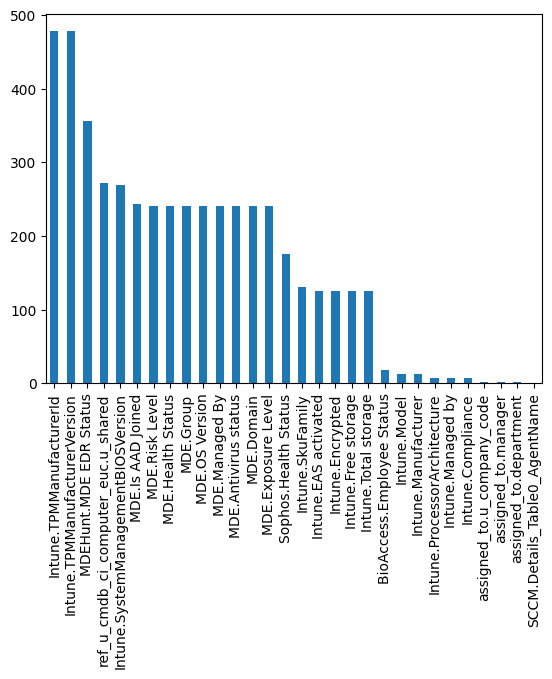

In [36]:
display(assets_df.apply(s_count_notlisted).sort_values(ascending=False)[:8])
assets_df.apply(s_count_notlisted).sort_values(ascending=False).iloc[:30].plot.bar()


The above shows that each column has up to 400 rows with "None Listed", but doesn't show us how much overlap there is. Counting rows with with any "None Listed" value shows that there are 940 rows where that value appears at least once. That's almost half of the data set. We loose too many rows be eliminating it, so we need to see if it's meaningfull anywhere.

940

<Axes: ylabel='Frequency'>

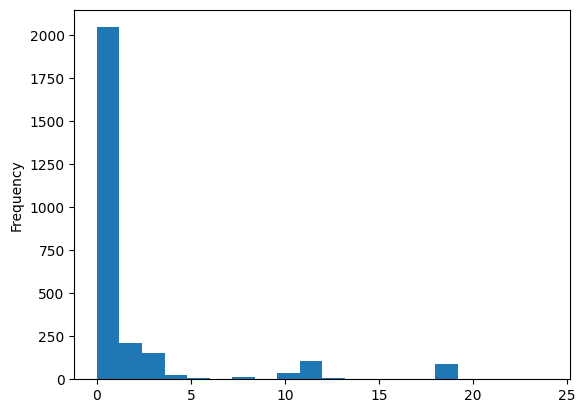

In [37]:
#count total rows missing values
display(len(assets_df.loc[assets_df.apply(s_count_notlisted, axis = 'columns')>0]))
display(assets_df.apply(s_count_notlisted, axis = 'columns').plot.hist(bins=20))

In [38]:
notlisted_s = assets_df.apply(s_count_notlisted).sort_values(ascending=False)
notlisted_s = notlisted_s.loc[notlisted_s>0]
notlisted_names = notlisted_s.index.to_list()
display(notlisted_s)
display(notlisted_names)
display(data_def_df.loc[data_def_df['Feature'].isin(notlisted_names)])
del notlisted_s

Intune.TPMManufacturerId               478
Intune.TPMManufacturerVersion          478
MDEHunt.MDE EDR Status                 356
ref_u_cmdb_ci_computer_euc.u_shared    272
Intune.SystemManagementBIOSVersion     269
MDE.Is AAD Joined                      243
MDE.Risk Level                         241
MDE.Health Status                      241
MDE.Group                              241
MDE.OS Version                         241
MDE.Managed By                         241
MDE.Antivirus status                   241
MDE.Domain                             241
MDE.Exposure Level                     241
Sophos.Health Status                   176
Intune.SkuFamily                       131
Intune.EAS activated                   125
Intune.Encrypted                       125
Intune.Free storage                    125
Intune.Total storage                   125
BioAccess.Employee Status               18
Intune.Model                            12
Intune.Manufacturer                     12
Intune.Proc

['Intune.TPMManufacturerId',
 'Intune.TPMManufacturerVersion',
 'MDEHunt.MDE EDR Status',
 'ref_u_cmdb_ci_computer_euc.u_shared',
 'Intune.SystemManagementBIOSVersion',
 'MDE.Is AAD Joined',
 'MDE.Risk Level',
 'MDE.Health Status',
 'MDE.Group',
 'MDE.OS Version',
 'MDE.Managed By',
 'MDE.Antivirus status',
 'MDE.Domain',
 'MDE.Exposure Level',
 'Sophos.Health Status',
 'Intune.SkuFamily',
 'Intune.EAS activated',
 'Intune.Encrypted',
 'Intune.Free storage',
 'Intune.Total storage',
 'BioAccess.Employee Status',
 'Intune.Model',
 'Intune.Manufacturer',
 'Intune.ProcessorArchitecture',
 'Intune.Managed by',
 'Intune.Compliance',
 'assigned_to.u_company_code',
 'assigned_to.manager',
 'assigned_to.department']

,Feature,Data Type,To Calculate,Notes
5,assigned_to.department,Categorical Text,NaN,NaN
7,assigned_to.manager,Categorical Text,NaN,NaN
9,assigned_to.u_company_code,Catigorical Text,NaN,NaN
13,BioAccess.Employee Status,Catigorical Text,NaN,NaN
22,Intune.Compliance,Catigorical Text,NaN,NaN
26,Intune.EAS activated,Catigorical Text,NaN,NaN
31,Intune.Encrypted,Catigorical Text,NaN,NaN
34,Intune.Free storage,int,impute,None Listed (125) -> Impute to median
41,Intune.Managed by,Catigorical Text,NaN,NaN
43,Intune.Manufacturer,Catigorical Text,NaN,NaN


Most of the above are cateigorical values. For this POC we'll treat The rest of None Listed as if it's a category. We just need to deal with it as a form of missing data in the two INT fields.

In [39]:
display('Not Listed Values')
display(assets_df[['Intune.Free storage']].apply(s_count_notlisted))

'Not Listed Values'

Intune.Free storage    125
dtype: int64

In [40]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
assets_df['Intune.Free storage']=assets_df['Intune.Free storage'].map(lambda x: np.nan if x == 'None Listed' else int(x))
assets_df['Intune.Free storage']=imp.fit_transform(assets_df.loc[:,['Intune.Free storage']])


In [41]:
display('Not Listed Values')
display(assets_df[['Intune.Free storage']].apply(s_count_notlisted))

'Not Listed Values'

Intune.Free storage    0
dtype: int64

In [42]:
test_df = pd.DataFrame([[1,2,3],[4,'None Listed',5],[6,'None Listed','None Listed']])
# test_df = pd.DataFrame([[1,2,3],[4,np.nan,5],[6,np.nan,np.nan]])
test_df.columns = ['a','b','c']
display(test_df)
test_df['c']=test_df['c'].map(lambda x: np.nan if x == 'None Listed' else int(x))
display(test_df)
test_df['c']=imp.fit_transform(test_df.loc[:,['c']])
display(test_df)
del test_df

,a,b,c
0,1,2,3
1,4,None Listed,5
2,6,None Listed,None Listed


,a,b,c
0,1,2,3.0
1,4,None Listed,5.0
2,6,None Listed,NaN


,a,b,c
0,1,2,3.0
1,4,None Listed,5.0
2,6,None Listed,4.0


<Axes: ylabel='count'>

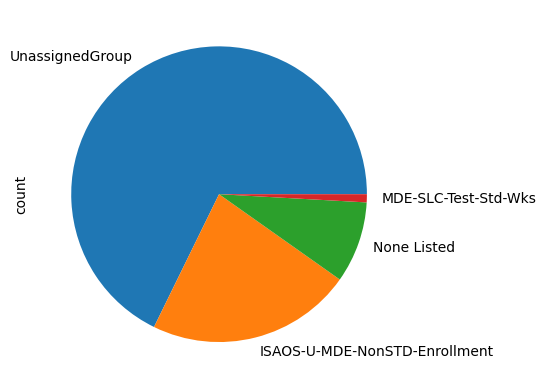

In [43]:
assets_df['MDE.Group'].value_counts().plot.pie()

Add standard / nonstandard info from sara and compare with MDE group

In [44]:
std_df = pd.read_csv('data/yLabels_StandardAndNonStandard_03Mar2023.csv')
display(f"{len(std_df)} std_df rows")
display(f"{len(std_df['CI Name'].unique())} std_df['CI Name'] unique rows")
# display(f"{std_df['CI Name'].isna().sum()} std_df['CI Name'] blank rows")

'3098 std_df rows'

"3098 std_df['CI Name'] unique rows"

In [57]:
assets_df['asset_id']=assets_df['asset_id'].apply(lambda x: str(x).upper())
std_df['CI Name']=std_df['CI Name'].apply(lambda x: str(x).upper())
# assets_df.head(2)

In [46]:
# std_df.set_index('CI Name', inplace=True)
# std_df.head(3)

In [59]:
#TODO: fix this join
cleaned_df = assets_df.merge(std_df, left_on='asset_id', right_on='CI Name')
cleaned_df.head()

,asset.cost_center,asset_id,assigned_to.active,assigned_to.department,assigned_to.employee_number,assigned_to.manager,assigned_to.u_company_code,BioAccess.Employee Status,Intune.Azure AD registered,Intune.Compliance,...,ref_u_cmdb_ci_computer_euc.u_shared,SCCM.Details_Table0_AgentName,SCCMODNS.ODNS Installed,Sophos.Health Status,u_status,u_sub_status,warranty_expiration,user_asset_count,Standard/ Non-Standard,CI Name


In [55]:
test_df = pd.DataFrame([['a','b','c'],['aAa','bBb','cCc']])
test_df[0] = test_df[0].apply(lambda x: str(x).upper())
test_df

,0,1,2
0,A,b,c
1,AAA,bBb,cCc
